# Analysing emotional lines

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

## Frequencies

In [3]:
from collections import Counter
from nltk.corpus import stopwords
from pymorphy2.tokenizers import simple_word_tokenize
from pymystem3 import Mystem
from tqdm import tqdm
from wordcloud import WordCloud

In [4]:
stops = stopwords.words("russian")
meaningful_pos = ["A", "ADV", "S", "V"]
mystem = Mystem()

In [6]:
def parse_lines(lines, mystem, stops):
    ready_lines = []
    for line in lines:
        good_tokens = []
        for word_analysis in mystem.analyze(line):
            if word_analysis.get("analysis"):
                lemma = word_analysis["analysis"][0]["lex"]
                pos = word_analysis["analysis"][0]["gr"].split("=")[0].split(",")[0]
                if (lemma not in stops) and (pos in meaningful_pos):
                    good_tokens.append(lemma)
        if good_tokens:
            ready_lines.append(" ".join(good_tokens))
    return ready_lines

In [7]:
with open("./data/positive_lines_lemmas.txt", "r", encoding="utf-8") as f_pos:
    pos_lines = parse_lines(f_pos.readlines(), mystem, stops)

In [8]:
positive_c = Counter()

for line in tqdm(pos_lines):
    tokens = simple_word_tokenize(line)
    positive_c.update(tokens)

100%|██████████| 9510/9510 [00:00<00:00, 81416.86it/s]


In [9]:
positive_c.most_common(100)

[('любить', 1445),
 ('человек', 1309),
 ('знать', 961),
 ('милый', 920),
 ('говорить', 894),
 ('хороший', 840),
 ('мочь', 792),
 ('сказать', 655),
 ('друг', 569),
 ('любовь', 526),
 ('очень', 515),
 ('счастливый', 505),
 ('дело', 435),
 ('видеть', 409),
 ('бог', 404),
 ('хотеть', 404),
 ('прекрасный', 381),
 ('давать', 375),
 ('умный', 373),
 ('радость', 361),
 ('добрый', 357),
 ('надежда', 347),
 ('понимать', 339),
 ('богатый', 328),
 ('слово', 321),
 ('жизнь', 302),
 ('иметь', 296),
 ('жить', 294),
 ('душа', 291),
 ('сердце', 283),
 ('становиться', 276),
 ('думать', 273),
 ('честный', 269),
 ('верный', 255),
 ('пойти', 241),
 ('женщина', 238),
 ('делать', 235),
 ('сделать', 235),
 ('святой', 234),
 ('достойный', 233),
 ('верить', 233),
 ('благородный', 226),
 ('должный', 217),
 ('деньги', 215),
 ('дом', 213),
 ('день', 213),
 ('молодой', 212),
 ('рука', 203),
 ('жена', 199),
 ('веселый', 198),
 ('свет', 195),
 ('правда', 194),
 ('право', 193),
 ('отец', 192),
 ('приятный', 189),
 ('г

(-0.5, 399.5, 199.5, -0.5)

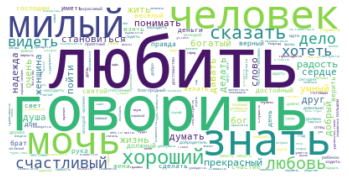

In [11]:
wordcloud = WordCloud(background_color="white").generate(" ".join(pos_lines))

plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")

Negative

In [13]:
with open("./data/negative_lines_lemmas.txt", "r", encoding="utf-8") as f:
    neg_lines = parse_lines(f.readlines(), mystem, stops)

In [15]:
negative_c = Counter()

for line in tqdm(neg_lines):
    tokens = simple_word_tokenize(line)
    negative_c.update(tokens)

100%|██████████| 7686/7686 [00:00<00:00, 98765.09it/s]


In [16]:
negative_c.most_common(100)

[('плакать', 645),
 ('смерть', 638),
 ('убивать', 428),
 ('несчастный', 338),
 ('мочь', 335),
 ('ужасный', 308),
 ('оставлять', 272),
 ('тиран', 238),
 ('гнев', 226),
 ('злой', 196),
 ('долг', 196),
 ('хотеть', 193),
 ('видеть', 184),
 ('умирать', 178),
 ('глупый', 173),
 ('жизнь', 162),
 ('бояться', 154),
 ('жестокий', 153),
 ('сердце', 151),
 ('сказать', 151),
 ('становиться', 138),
 ('мешать', 129),
 ('слабый', 127),
 ('страшный', 127),
 ('черт', 123),
 ('злодей', 118),
 ('враг', 116),
 ('темный', 114),
 ('знать', 114),
 ('страдать', 111),
 ('лютый', 111),
 ('беда', 110),
 ('человек', 105),
 ('дело', 105),
 ('душа', 104),
 ('давать', 104),
 ('вор', 101),
 ('смотреть', 101),
 ('страх', 96),
 ('сомнение', 93),
 ('говорить', 92),
 ('жить', 90),
 ('время', 88),
 ('отец', 88),
 ('забывать', 86),
 ('ненавидеть', 86),
 ('думать', 85),
 ('день', 85),
 ('уходить', 84),
 ('идти', 83),
 ('должный', 83),
 ('обман', 83),
 ('старый', 81),
 ('глаз', 81),
 ('сумасшедший', 81),
 ('голова', 81),
 ('б

(-0.5, 399.5, 199.5, -0.5)

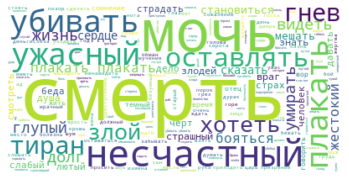

In [17]:
wordcloud = WordCloud(background_color="white").generate(" ".join(neg_lines))

plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")